**TOV Equation Solver by Python**        
by *Hossein Fatheddin*

This Program is written in Python in order to solve TOV Equations Using Runge-Kutta 4th order method:          
$\epsilon = \epsilon_0 P^n (r)$        
$p = K \epsilon^{1+1/n} = p_0 P^{n+1} (r)$    
then the program will depend on 3 parameters:     
$c=\frac{\epsilon_0}{p_0}$ , K and n.     
I have used the TOV solving methods mentiond in references [1] , [2] and [3].         
At the end there is a program to plot *Mass - Distance* and *Pressure - Distance* plots.    
Also please note that here I have used units as $c = G = 1$ and in the main body, the dimensionless quantities are used.       
EOS:                    
$\frac{dm}{dr}=4\pi \epsilon r^2$      
$\frac{dp}{dr}=\frac{-(m(r)+4\pi \epsilon r^3)(\epsilon +p)}{(1+2\frac{m(r)}{r})r^2}$                  
Dimensionless quantities:                           
$M=m\sqrt{\epsilon_0}$                     
$R=r\sqrt{\epsilon_0}$                     
NEW EOS:                  
$\frac{dM}{dR}=4\pi R^2P^n(r)$                                   
$\frac{dP}{dR}=\frac{-c+PM(R)+4\pi R^3 \frac{P^{n+1}}{c}}{(n+1)R(R-2M(R))}$                        
With Initial Conditions:   M(0)=0 & P(0)=1                    
    

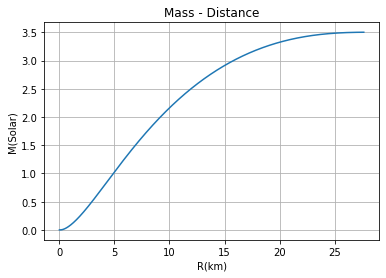

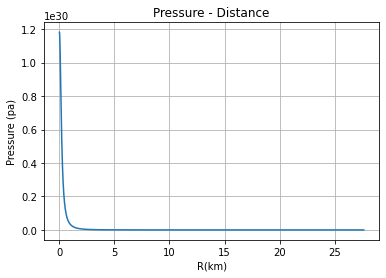

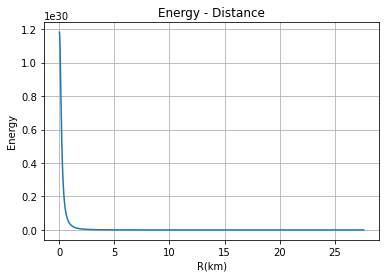

In [3]:
import numpy as np
from matplotlib import pyplot as plt
c=0.04
K=4.0*10**(8)
n=1.5
def dM(xi, p):
    return 4*np.pi*xi**2*p**n
def dP(xi, p, mu):
    return -1.0*(c+p)/(n+1)*(mu+4*np.pi*xi**3*p**(n+1)/c)/(xi*(xi-2*mu))
data = open("TOV2.dat","w+")
data.write("xi: Dimensionless distance\nP: Dimensionless pressure P\nM: Dimensionless mass M\n\n\nxi\tP\tM\n")
h = 0.00001
xi = 0.00001
P= 1
m = 0
XI = []
Pi = []
MU = []
while P>=0.0001:
    XI.append(xi)
    MU.append(m)
    Pi.append(P)
    data.write(str(xi)+"\t"+str(P)+"\t"+str(m)+"\n")
    m_k1 = dM(xi, P)
    P_k1 = dP(xi, P, m)
    m_k2 = dM(xi+(1/2)*h, P+(1/2)*P_k1*h)
    P_k2 = dP(xi+(1/2)*h, P+(1/2)*P_k1*h, m+(1/2)*m_k1*h)
    m_k3 = dM(xi+(1/2)*h, P+(1/2)*P_k2*h)
    P_k3 = dP(xi+(1/2)*h, P+(1/2)*P_k2*h, m+(1/2)*m_k2*h)
    m_k4 = dM(xi+h, P+P_k3*h)
    P_k4 = dP(xi+h, P+P_k3*h, m+m_k3*h)
    m = m + (m_k1+2*m_k2+2*m_k3+m_k4)*h/6
    P = P + (P_k1+2*P_k2+2*P_k3+P_k4)*h/6
    xi = xi + h
data.close()
#Unit Conversion Functions:
R = []
M = []
Pr = []
def MUnits(M):
    return M/np.sqrt((c*K)**(-1.0*n))*1.3466*10**28*5*10**(-34)
def RUnits(xi):
    return xi/np.sqrt((c*K)**(-1.0*n))*10**(-5)
def PrUnits(p):
    return ((c*K)**(-1.0*(n+1))*p**(n+1)/(8.263*10**(-50)))/10    
for i in range(0, len(XI)-1, 1):
    R.append(RUnits(XI[i]))
    M.append(MUnits(MU[i]))
    Pr.append(PrUnits(Pi[i]))
#plots
plot1=plt.figure(1)
plt.plot(R,M)
plt.xlabel("R(km)")
plt.ylabel("M(Solar)")
plt.title("Mass - Distance")
plt.grid(True, which='both')
plot2=plt.figure(2)
plt.plot(R,Pr)
plt.xlabel("R(km)")
plt.ylabel("Pressure (pa)")
plt.title("Pressure - Distance")
plt.grid(True, which='both')
plt.show()
plot3=plt.figure(3)
plt.plot(R,Pr)
plt.xlabel("R(km)")
plt.ylabel("Energy")
plt.title("Energy - Distance")
plt.grid(True, which='both')
plt.show()